<a href="https://colab.research.google.com/github/Lucas-Buk/IMT/blob/main/Tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
# instala biblioteca para leitura de excel e biblioteca gráfica

!pip install xlrd
!pip install -U plotly
# !pip install plotly==4.8.1

# organização da planilha excel

!pip install nltk

# Exportando figuras com melhores resoluções

!pip install -U kaleido

In [ ]:
!add-apt-repository -y ppa:cran/poppler
!apt-get update
!apt-get install -y libpoppler-cpp-dev

In [ ]:
!apt-get install poppler-utils 

In [ ]:
# Importa a biblioteca pandas

import pandas as pd
pd.options.plotting.backend = "plotly"

# Importa biblioteca para conversão de datas

from datetime import datetime

# Bilbioteca gráfica utilizada neste estudo

import plotly.express as px
import plotly.figure_factory as ff

# Importando pacote
import nltk
nltk.download("popular")
import pandas as pd
import numpy as np

# Stemming pt
nltk.download('rslp')

# biblioteca numérica

import scipy.stats as stats
import scipy
from sklearn.metrics import r2_score

In [19]:
# biblioteca numérica
from scipy.interpolate import interp1d
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [21]:
# Diretório de imagens
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [22]:
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import matplotlib

# **Funções proprietárias**

In [23]:
#######################################################################

def DataNorm(Acc):

  # Montagem do Kernel

  variavel =  scipy.stats.zscore(Acc, axis=0, ddof=0)
  empilhada = variavel.tolist()
  empilhada += [24+i for i in variavel.tolist() ]
  empilhada += [48+i for i in variavel.tolist() ]
  bins = np.linspace(0,24,24)
  bins = 3*bins.tolist()
  Kernel = stats.gaussian_kde(empilhada)

  Acc_kernel = Kernel(np.linspace(25,49,24))


  return Acc_kernel

#######################################################################

In [24]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = np.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

**Função de visualização:**

f(a1,a2,a3,... aN, 'acidente', 'bocejo',...'final')

Comando (!)

In [152]:
def graphics_plot(y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  for i, v in enumerate(y):
    
    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if i == 0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=np.linspace(0,24,bins),
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2)),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=np.linspace(0,24,bins),
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2,dash=dash[i-1])),
          # line_shape='spline'),
          secondary_y=on)
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Time of day')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

In [26]:
def graphics_plot_v2(y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  if len(yaxes_title) == 1:
    on = False
  else:
    on = True

  j = 0
  k = 0

  for i, v in enumerate(y):

    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if k == 4:
      k = 0
      j+=1
    
    if k==0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=np.linspace(0,24,bins),
          y=v, name=y_name[i],
          marker_symbol=markers[j],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2),),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=np.linspace(0,24,bins),
          y=v, name=y_name[i],
          marker_symbol=markers[j],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2, dash=dash[k-1]),),
          # line_shape='spline'),
          secondary_y=on)
    k+=1
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Time of day')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

# **Dados**

In [14]:
## Carrega uma determinada planilha na variável file

# Monitoramento
fileE3  = '/content/drive/MyDrive/Trabalho/KLB_Final/Monitoramento/Monitoramento 2018_2019 E3.xlsx'
fileE5  = '/content/drive/MyDrive/Trabalho/KLB_Final/Monitoramento/Monitoramento E5 - 2019.xlsx'
fileE9  = '/content/drive/MyDrive/Trabalho/KLB_Final/Monitoramento/Monitoramento E9 - Abril 2019 a fevereiro 2020.xlsx'
fileE9r = '/content/drive/MyDrive/Trabalho/KLB_Final/Monitoramento/Monitoramento E9 - Março a Maio 2020.xlsx'
#fileCAS = '/content/drive/MyDrive/Trabalho/KLB_Final/Cabine Anti Sono/Cabine Sono.xlsx'
# Ocorrências
fileOCO = '/content/drive/MyDrive/Trabalho/KLB_Final/Ocorrências/Ocorrências_2017_2018_2019.xlsx'

# Informações gerais
fileINF = '/content/drive/MyDrive/Trabalho/KLB_Final/Informações Gerais/Informações gerais empresa Código.xlsx'


## Carrega a planilha em um data frame
# Monitoramento
dfE31 = pd.read_excel(fileE3)
xls3 = pd.ExcelFile(fileE3)
dfE3 = pd.read_excel(fileE3, xls3.sheet_names[1])

dfE5 = pd.read_excel(fileE5) 
# Arquivo E9 tem mais planilhas internamente
dfE9 = pd.read_excel(fileE9)
xls9 = pd.ExcelFile(fileE9)
dfE91 = pd.read_excel(fileE9, xls9.sheet_names[1])
dfE92 = pd.read_excel(fileE9,  xls9.sheet_names[2])
#dfCAS = pd.read_excel(fileCAS)
# Ocorrencias
dfOCO = pd.read_excel(fileOCO)

# Informações gerais
dfINF = pd.read_excel(fileINF)

In [27]:
## Dados PRF ##################################################
# Acidentes

#file2013  = '/content/drive/MyDrive/Trabalho/PRF/PF2013.xlsx'
#file2014  = '/content/drive/MyDrive/Trabalho/PRF/PF2014.xlsx'
file2015  = '/content/drive/MyDrive/Trabalho/PRF/PF2015.xlsx'
#file2016  = '/content/drive/MyDrive/Trabalho/PRF/PF2016.xlsx'
#file2017  = '/content/drive/MyDrive/Trabalho/PRF/PF2017.xlsx'

# Multas

#dfMultas = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/Multas.csv') 

#dfVel = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/prfInfraSpeedTruck.csv') 
#dfBr  = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggBr.csv') 
#dfLei = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggLei.csv') 
#dfMes = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggMonth.csv') 
#dfEst = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggSeason.csv') 
#dfSem = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggWeek.csv') 
#dfAno = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/sumInfraAggYear.csv') 

# Fluxo

dfFluxo = pd.read_csv('/content/drive/MyDrive/Trabalho/PRF/DNIT.csv') 

# Montando as bases de dados

#df13 = pd.read_excel(file2013)
#df14 = pd.read_excel(file2014)
df15 = pd.read_excel(file2015)
#df16 = pd.read_excel(file2016)
#df17 = pd.read_excel(file2017)

Corrigindo, a empresa que realiza monitoramento é a E17 e não a E5, por gentileza alterar.

Então conforme alinhamos, irei coletar as informações das empresas E17 e E9, além da Klabin. Essas empresas são as que tem monitoramento por câmeras. Além dessas, temos os PMT porém eles iniciaram recentemente o monitoramento por câmeras.

Informações sobre o monitoramento:

Monitoramento_2018_2019: alertas de sono detectados pelas câmeras nos veículos Klabin. Iniciou em 07 de 2018, sendo que a implantação em 100% dos veículos foi a partir de fevereiro de 2019. Os alertas são referente as piscada de olho superior a 3 segundos.

Monitoramento_pmt_códigos:  alertas de sono detectados das pequenas e médias transportadoras. Os alertas são referente as piscada de olho superior a 3 segundos. (Desde 20/08/2019)

Dados Monitoramento Empresa E5: alertas de sono da empresa terceira E5 mês 10, avaliam bocejo e fechada de olha, imagens não são tratadas.  (desde o incio do ano)

Dados Monitoramento Empresa E9: alertas de sono da empresa terceira E9 mês 10, imagens são tratadas, dados onde a piscada foi superior a 1,5 segundos e menor que 3 segundo (fadiga Nível 1). (desde mês 03 de 2019).

Consegui contato com as empresas e confirmei a informação referente ao descanso, para as 3 empresas avaliadas o descanso é de 60 horas.

Sobre o monitoramento da empresa E5 acredito que até segunda-feira encaminho a informação.

Primeiramente gostaria de confirmar se recebeu o shipe que encaminhei e se a informação é suficiente.

Entrei em contato com a empresa E9 para entender melhor o que é cada alerta do monitoramento, o Yawn-Warning capta o bocejo, o Atten-Warning é todo e qualquer desvio de atenção, como por exemplo, olhar para o lado, e o Tired é o cansaço, então é quando o motorista fechou o olhou por mais de 1,5 segundos.

Sobre o questionamento sobre a jornada, eles não passaram o quanto em horas seria esses dois dias de descanso, porém as empresas E3 e E9, passaram que é fixa a escala, não alterando quando retorno dos dias de descanso.

Estou aguardando agora o retorno da empresa E5 para passar o restante das informações.

em uma das planilhas temos escala de trabalho classificada como 1,2,3 - O que significam estes números?
Esse número representa qual dia da escala de trabalho o colaborador está. Por exemplo, o colaborador está no segundo dia da escala de trabalho dele.

O que é a medida em segundo momento?
É quando o colaborador precisou repetir o teste de reflexo por algum motivo, mas não temos a informação do motivo.

Escala 4x2 significa 4 dias de trabalho e 2 de descanso?
Isso, exatamente.

Quando você menciona 3 horas extras - significa que todos fazem ou alguns fazem ?
São horas eventuais, mas quando me passaram da frota própria, passaram com essas horas inclusas.

Qual o significado do termo PMT?
Pequenas e Médias Transportadoras.

O que significa o prefixo VPP?existem outras classificações? 
Es letras do prefixo são referentes as empresas, o VPP é Veículo próprio pesado da nossa frota própria.

O que significa Fadiga N1? existem outras classificações? 
Então essa terminologia é utilizada apenas por uma empresa e significa que o colabora fechou os olhos por mais de 1,5 segundos e no caso a mesma empresa tem o N2 que é quando é por mais de 3 segundos. Mas eles enviaram só as informações de N1 por enquanto.

como interpretar as colunas potencial e SAP?
Então o potencial é a classificação que damos as ocorrências, vou te enviar o texto que consta no nosso procedimento, mas é nosso critério para definição do potencial e o número SAP é o número para buscar o relatório dessa ocorrência, mantive para caso precise procurar fica mais fácil.

Texto Procedimento de Classificação de Ocorrência:

Potencialidade: Conceito aplicado para as ocorrências de acidentes e incidentes considerando a suscetibilidade de existir ou acontecer, mas sem a existência real de um determinada de uma perda.

Potencial Leve (PL): Acidente ou Incidente onde não houve potencialidade de gerar nenhuma das lesões citadas no critério total e permanente;

Potencial Grave (PG): Acidente ou Incidente onde tenha gerado ou houve a possibilidade de ocasionar:

 Incapacidade total e permanente;


 Perdas de função;

Ø Amputação total ou parcial nos membros superiores e/ou inferiores (amputação de dedo(s) das mãos com perda total da função de preensão, amputação da mão/pé, amputação do antebraço/braço/perna);

Ø Perda total ou parcial de um órgão pós trauma ou em decorrência de lesão grave;

Ø Perda total ou parcial de função de órgão em decorrência de lesão grave;

Ø Fratura exposta;

Ø Incapacidade total ou parcial permanente por dano neurológico ou motor;

Ø Queimaduras que resultem em sequelas definitivas com restrição de função de membros superiores e inferiores;

Danos estéticos;

Ø Lesão/cicatriz na face ou deformidade visível com aparência, permanência e irreparabilidade pelos meios comuns ou por si mesma, onde o dano estético apreciável causa complexo ou interfere negativamente na vida social com deformidade de mais de 10% da superfície facial ou 25% de qualquer outra parte do corpo (mãos, pés, braços, pernas e tronco).

Potencial Fatal (PF): Acidente ou incidente onde tenha gerado ou houve a potencialidade de fatalidade.

Tempo de empresa está em meses ou anos (tem valores como 86 e 407, estão corretos)?
Está em meses.

Entrei em contato com a empresa E5 e o alerta referente a piscada é de acordo com o número de piscadas por minuto, porém eles não souberem especificar qual seria esse número.

A empresa iria tentar a informação, buscando o fornecedor mas ainda não obtive nenhum retorno.

Verifiquei alguns pontos para ajuste:

- No campo autores, aparece a legenda “1” para meu nome e da Clara, porém na legenda a Klabin está como “c”.

- Ainda referente aos autores, segue meu nome completo para atualizar: Verônica Marques Lopes

- Na linha “94”, está descrito que a empresa E5 dispõem de 3 sistemas de fadiga, porém conforme descrito na sequência, são apenas 2, bocejo e olho fechado.

- Ajustar descrição do alerta referente a E5: número de piscadas por minuto.

- Desta forma, na linha “98”, ajustar que o alerta referente a Eye closed, considera critérios diferentes, para as empresas E5 e E9.


# **Tratamento de dados**



1.   motoristas em cada hora cheia - E3, E5 e E9
2.   acidentes em cada hora cheia - madeira
3.   eventos em cada hora cheia: bocejo, fadiga, atenção, tired,...



## **Informações Gerais**

In [29]:
dfINF.head()

,Empresa,Escala,Jornada,Intervalos,N° de Colaboradores por turno,Tempo médio de deslocamento,Observação,Unnamed: 7
0,E5,4X2,00 às 11 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),3.0,NaN,NaN,NaN
1,E5,4X2,1 às 12 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),8.0,NaN,NaN,NaN
2,E5,4X2,2 às 13 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),6.0,NaN,NaN,NaN
3,E5,4X2,4 às 15 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),5.0,NaN,NaN,NaN
4,E5,4X2,5 às 16 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),6.0,NaN,NaN,NaN


In [30]:
dfINF.shape

(66, 8)

In [31]:
dfInf_expand = dfINF.Jornada.str.split(' ', expand=True)
dfInf_expand.head()

,0,1,2,3
0,00,às,11,horas
1,1,às,12,horas
2,2,às,13,horas
3,4,às,15,horas
4,5,às,16,horas


In [32]:
dfINF['Inicio'] = dfInf_expand[0].astype('int64')
dfINF['Fim'] = dfInf_expand[2].astype('int64')
dfINF.tail()

,Empresa,Escala,Jornada,Intervalos,N° de Colaboradores por turno,Tempo médio de deslocamento,Observação,Unnamed: 7,Inicio,Fim
61,E9,4X2,16 às 04 horas,Mínimo 1 hora,2.0,Aproximadamente 22 min,NaN,NaN,16,4
62,E9,4X2,17 às 05 horas,Mínimo 1 hora,6.0,Aproximadamente 22 min,NaN,NaN,17,5
63,E9,4X2,18 às 06 horas,Mínimo 1 hora,8.0,Aproximadamente 22 min,NaN,NaN,18,6
64,E9,4X2,19 às 07 horas,Mínimo 1 hora,2.0,Aproximadamente 22 min,NaN,NaN,19,7
65,E9,4X2,20 às 08 horas,Mínimo 1 hora,2.0,Aproximadamente 22 min,NaN,NaN,20,8


In [33]:
dfINF.dtypes

Empresa                           object
Escala                            object
Jornada                           object
Intervalos                        object
N° de Colaboradores por turno    float64
Tempo médio de deslocamento       object
Observação                        object
Unnamed: 7                        object
Inicio                             int64
Fim                                int64
dtype: object

In [34]:
dfINF.isnull().sum()

Empresa                           0
Escala                            0
Jornada                           0
Intervalos                        0
N° de Colaboradores por turno    10
Tempo médio de deslocamento      20
Observação                       40
Unnamed: 7                       40
Inicio                            0
Fim                               0
dtype: int64

In [35]:
dfINF_limpo = dfINF.dropna(subset=['N° de Colaboradores por turno'])
dfINF_limpo.shape

(56, 10)

In [36]:
dfINF_limpo.Empresa.value_counts()

E5    20
E9    20
E3    16
Name: Empresa, dtype: int64

In [37]:
dfInfE3 = dfINF_limpo[dfINF_limpo.Empresa == 'E3']
dfInfE5 = dfINF_limpo[dfINF_limpo.Empresa == 'E5']
dfInfE9 = dfINF_limpo[dfINF_limpo.Empresa == 'E9']
print(dfInfE3.shape,dfInfE5.shape,dfInfE9.shape)

(16, 10) (20, 10) (20, 10)


## **Ocorrências**

In [38]:
dfOCO.head(2)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,HORA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO
0,IBP,E3,ANGATUBA,ANGATUBA,PÁTIO DE MADEIRA,C422,OPERADOR DE MÁQUINA FLORESTAL,2,36.0,2017-01-03,TERÇA-FEIRA,10:20:00,PÁTIO DE MADEIRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AO SE DESLOCAR COM O TRATOR ATÉ O PICADOR, A J...",LPG,6008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IBP,E3,PESQUISA,PESQUISA,PESQUISA,C365,LÍDER DE TURMA,81,28.0,2017-01-04,QUARTA-FEIRA,15:00:00,LAGOA - Viveiro Florestal,NaN,RETA,NaN,NaN,AM-232,NaN,NaN,VEÍCULO DE LOCOMOÇÃO DE PESSOAS,A COLABORADORA ESTAVA EM DESLOCAMENTO NO VIVEI...,LPL,6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dfOCO.columns

Index(['CLASSIFICAÇÃO', 'EMPRESA', 'GERÊNCIA', 'COORDENAÇÃO ', 'SUB ÁREA',
       'NOME', 'CARGO', 'TEMPO DE EMPRESA', 'IDADE', '\nDATA DA OCORRÊNCIA',
       'DIA DA SEMANA', 'HORA', ' \nLOCAL DA OCORRÊNCIA', 'QUALIDADE PISTA',
       'CARACTERISTICA PISTA', 'SINALIZAÇÃO', 'CLIMA', 'PREFIXO', 'MODELO',
       'CARREGADO', 'TIPO ', 'DETALHAMENTO', 'POTENCIAL', 'SAP', 'DIA ESCALA',
       'ESCALA', 'JORNADA ', 'TEMPO DECORRIDO', 'DORMIU BEM?',
       'PRÓXIMO PERIODO DE FÉRIAS OU FERIADO', 'ALIMENTOU', 'PROBLEMAS SAÚDE ',
       'USO MEDICAMENTO', 'USO ALCOOL/DROGA', 'PRESSÃO',
       'PRESSA PARA CONCLUIR O TRABALHO', 'DESCRIÇÃO '],
      dtype='object')

In [40]:
dfOCO['TIPO '].value_counts()

TRANSPORTE DE MADEIRA              224
VEÍCULO DE LOCOMOÇÃO DE PESSOAS    102
TRANSPORTE GERAL                    52
TRANSPORTE DE MADEIRA                4
Name: TIPO , dtype: int64

In [41]:
# Ocorrências
dfOCO = pd.read_excel(fileOCO)
dfOCO = dfOCO.dropna(subset=['EMPRESA'])
dfOCO = dfOCO.dropna(subset=['TIPO '])
dfOCO['HorarioAcidente'] = pd.to_datetime(dfOCO['HORA'], format='%H:%M:%S').dt.hour
dfOCO.set_index('HORA',drop=True,inplace=True)
dfOCO.head(3)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO,HorarioAcidente
HORA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15:00:00,IBP,E3,PESQUISA,PESQUISA,PESQUISA,C365,LÍDER DE TURMA,81,28.0,2017-01-04,QUARTA-FEIRA,LAGOA - Viveiro Florestal,NaN,RETA,NaN,NaN,AM-232,NaN,NaN,VEÍCULO DE LOCOMOÇÃO DE PESSOAS,A COLABORADORA ESTAVA EM DESLOCAMENTO NO VIVEI...,LPL,6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
21:40:00,IAP,E2,LOGÍSTICA,TRANSPORTE FLORESTAL,LOGÍSTICA,C409,MOTORISTA,3,48.0,2017-01-17,TERÇA-FEIRA,DISTRITO INDUSTRIAL,PRECARIA,DECLIVE,NaN,NaN,GFR 028,NaN,SIM,TRANSPORTE DE MADEIRA,COLABORADOR DESLOCAVA-SE COM CAMINHÃO DA EMPRE...,LPG,6072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
13:51:00,IBP,E3,LOGÍSTICA,PROG. LOGÍSTICA,PROG. LOGÍSTICA E PÁTIOS,C240,SUPERVISOR,17,26.0,2017-01-19,QUINTA-FEIRA,PR 092,ASFALTADA,ACLIVE,NaN,BOAS CONDIÇÕES,AM-329,FOX,NÃO,VEÍCULO DE LOCOMOÇÃO DE PESSOAS,AO DESLOCAR-SE EM ACLIVE COM O VEICULO AM-329 ...,LPL,6081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,NaN,NÃO,"O CONDUTOR ESTAVA BEM DE SAUDE, NÃO ESTAVA COM...",13


In [42]:
dfOCO.isnull().sum()

CLASSIFICAÇÃO                             0
EMPRESA                                   0
GERÊNCIA                                  0
COORDENAÇÃO                               2
SUB ÁREA                                  2
NOME                                     23
CARGO                                     5
TEMPO DE EMPRESA                         29
IDADE                                    28
\nDATA DA OCORRÊNCIA                      0
DIA DA SEMANA                             0
 \nLOCAL DA OCORRÊNCIA                    1
QUALIDADE PISTA                         216
CARACTERISTICA PISTA                    220
SINALIZAÇÃO                             367
CLIMA                                   319
PREFIXO                                  27
MODELO                                  235
CARREGADO                               173
TIPO                                      0
DETALHAMENTO                              0
POTENCIAL                                 0
SAP                             

In [43]:
TM = (dfOCO['TIPO '] == 'TRANSPORTE DE MADEIRA') | (dfOCO['TIPO '] == 'TRANSPORTE DE MADEIRA ')

dfOCO_TM = dfOCO[TM]
dfOCO_TM.EMPRESA.value_counts()

E3     48
E9     42
E2     28
E7     21
E5     19
E4     16
E12    13
E16     9
E1      8
E13     5
E19     3
E23     3
E26     2
E32     2
E34     1
E14     1
E36     1
E31     1
E33     1
E25     1
E30     1
E22     1
Name: EMPRESA, dtype: int64

In [44]:
E3 = (dfOCO_TM['EMPRESA'] == 'E3')
E5 = (dfOCO_TM['EMPRESA'] == 'E5')
E9 = (dfOCO_TM['EMPRESA'] == 'E9')

dfOCO_TM_E3 = dfOCO_TM[E3]
dfOCO_TM_E5 = dfOCO_TM[E5]
dfOCO_TM_E9 = dfOCO_TM[E9]

print(dfOCO_TM_E3.shape,dfOCO_TM_E5.shape,dfOCO_TM_E9.shape)

(48, 37) (19, 37) (42, 37)


## **Estradas federais**

In [45]:
df15['Hora'] = pd.to_datetime(df15['horario'], format='%H:%M:%S').dt.hour
df15.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,Hora
0,83298209,2015-01-01,Quinta,00:05:00,RJ,101,327.0,NITEROI,Outras,Colisão traseira,Sem Vítimas,Plena noite,Decrescente,Ceu Claro,Dupla,Reta,Urbano,2015,2,0,0,0,2,0,0,2,0
1,83298218,2015-01-01,Quinta,01:20:00,MS,163,434.4,CAMPO GRANDE,Animais na Pista,Saída de Pista,Com Vítimas Feridas,Plena noite,Crescente,Ceu Claro,Simples,Reta,Rural,2015,2,0,1,0,1,0,1,1,1
2,83298220,2015-01-01,Quinta,01:45:00,RJ,40,64.0,PETROPOLIS,Outras,Colisão com objeto fixo,Sem Vítimas,Plena noite,Crescente,Nublado,Dupla,Reta,Urbano,2015,2,0,0,0,2,0,0,2,1
3,83298221,2015-01-01,Quinta,02:50:00,SC,101,356.1,SANGAO,Falta de atenção,Saída de Pista,Com Vítimas Feridas,Plena noite,Crescente,Ceu Claro,Dupla,Reta,Urbano,2015,4,0,4,0,0,0,4,1,2
4,83298222,2015-01-01,Quinta,02:50:00,RS,101,25.9,TRES CACHOEIRAS,Falta de atenção,Saída de Pista,Sem Vítimas,Plena noite,Decrescente,Nublado,Dupla,Reta,Urbano,2015,1,0,0,0,1,0,0,1,2


In [46]:
dfFluxo['avgtotal'].loc[2::3]   # [star:stop:step] - se ficar livre vai até o final
dfDNIT = pd.DataFrame(dfFluxo['avgtotal'].loc[2::3].values.reshape(4,24)).T
dfDNIT.tail()

,0,1,2,3
19,342.206554,276.263322,267.873313,262.693239
20,266.653952,213.115489,205.209297,200.119518
21,217.674901,172.611702,164.695324,160.408976
22,183.319164,143.476845,136.172760,132.808623
23,131.100690,104.440947,97.717366,94.281760


In [47]:
counts, bins = np.histogram(df15['Hora'], bins=range(0, 25, 1))
acidentes = np.array(counts)/sum(np.array(counts))
fluxo     = np.array(dfDNIT[0]/sum(dfDNIT[0]))

taxa      = (acidentes/fluxo)/sum(acidentes/fluxo)

## **Empresas**


### **E5 - Hora**

In [48]:
dfE5H = pd.read_excel(fileE5)
dfE5H['HORA'] = pd.to_datetime(dfE5H['DATA'], format='%Y-%M-%D %H:%M:%S').dt.hour
dfE5H.head(2)

,Nome,DATA,HORA,Tipo de Desatenção,Velocidade
0,NaN,2019-01-04 11:46:41,11,Olho Fechado,57
1,NaN,2019-01-11 19:11:04,19,Olho Fechado,48


### **E9 - Hora**

In [49]:
dfE91H = pd.read_excel(fileE9, xls9.sheet_names[1])
dfE91H['HORA'] = pd.to_datetime(dfE91H['Data da ocorrência'], format='%Y-%M-%D %H:%M:%S').dt.hour
dfE91H.head(2)

,Data da ocorrência,dia,mês,Tipo,Velocidade,Tratativa,Placa,Motorista,Unnamed: 8,HORA
0,2019-04-23 22:59:00,2019-04-23,2019-04-23,Yawn-Warning,35,NaN,PLP3I10,NaN,NaN,22
1,2019-04-23 19:46:00,2019-04-23,2019-04-23,Yawn-Warning,62,NaN,PLP3I10,NaN,NaN,19


In [50]:
dfE92H = pd.read_excel(fileE9,  xls9.sheet_names[2])
dfE92H['HORA'] = pd.to_datetime(dfE92H['Data da ocorrência'], format='%Y-%M-%D %H:%M:%S').dt.hour
dfE92H.head(2)

,Data da ocorrência,dia,mês,Tipo,Velocidade,Tratativa,Placa,Motorista,Unnamed: 8,HORA
0,2019-12-01 23:59:00,2019-12-01,2019-12-01,Atten-Warning,33,NaN,CQU5528,C805,NaN,23
1,2019-12-01 23:10:00,2019-12-01,2019-12-01,Atten-Warning,37,NaN,QPY2670,C784,NaN,23


# **Estradas**

In [154]:
graphics_plot(y=[taxa, fluxo, acidentes], y_name=['Accidents/traffic', 'Traffic','Accidents (raw)'],
              bins=24, yaxes_title=['Accidents/traffic, Traffic','Accidents'], title='Accidents, traffic and accidents / traffic',
              x_tick=2)

# **E3**

**Motoristas por hora**

In [52]:
dfInfE3.reset_index(inplace=True)
dfInfE3.head()

,index,Empresa,Escala,Jornada,Intervalos,N° de Colaboradores por turno,Tempo médio de deslocamento,Observação,Unnamed: 7,Inicio,Fim
0,30,E3,4X2,4 às 16 horas,1 hora refeição e a cada 3 ou 4 horas 15 min d...,10.0,25 min (van),Jornada a partir de 17/07/2019,Jornada referente a transporte de madeira,4,16
1,31,E3,4X2,5 às 17 horas,1 hora refeição e a cada 3 ou 4 horas 15 min d...,8.0,25 min (van),Jornada a partir de 17/07/2019,Jornada referente a transporte de madeira,5,17
2,32,E3,4X2,6 às 18 horas,1 hora refeição e a cada 3 ou 4 horas 15 min d...,8.0,25 min (van),Jornada a partir de 17/07/2019,Jornada referente a transporte de madeira,6,18
3,33,E3,4X2,7 às 19 horas,1 hora refeição e a cada 3 ou 4 horas 15 min d...,8.0,25 min (van),Jornada a partir de 17/07/2019,Jornada referente a transporte de madeira,7,19
4,34,E3,4X2,15 às 03 horas,1 hora refeição e a cada 3 ou 4 horas 15 min d...,8.0,25 min (van),Jornada a partir de 17/07/2019,Jornada referente a transporte de madeira,15,3


In [53]:
dfE3_motoristas_hora = pd.DataFrame(np.zeros(24, dtype='int64'), columns=['motoristasE3'])
for index, row in dfInfE3.iterrows():
    if row['Inicio'] < row['Fim']:
      dfE3_motoristas_hora['motoristasE3'][row['Inicio']:row['Fim']] += row['N° de Colaboradores por turno']
    else:
      dfE3_motoristas_hora['motoristasE3'][0:row['Fim']] += row['N° de Colaboradores por turno']
      dfE3_motoristas_hora['motoristasE3'][row['Inicio']:24] += row['N° de Colaboradores por turno']

In [54]:
dfE3_motoristas_hora.index.name = 'HORA'
dfE3_motoristas_hora

,motoristasE3
HORA,
0,80.0
1,80.0
2,68.0
3,60.0
4,50.0
5,50.0
6,68.0
7,68.0
8,68.0


**Eventos por hora**

In [55]:
dfE3.head(2) 

,HORA,TIPO,QTDE,UO,PREFIXO,LOCALIZAÇÃO,PONTO REFERÊNCIA,DIA DA SEMANA,COLABORADOR
0,0,FADIGA MOTORISTA,AYM8091,MADEIRA,VPP 560,Ortigueira - Paraná,NaN,sex,C170
1,0,FADIGA MOTORISTA,AYM8091,MADEIRA,VPP 560,Reserva - Paraná,NaN,sex,C170


In [56]:
dfE3.shape

(3954, 9)

In [57]:
dfE3.TIPO.unique()

array(['FADIGA MOTORISTA'], dtype=object)

In [58]:
dfE3['TIPO'].value_counts()

FADIGA MOTORISTA    3954
Name: TIPO, dtype: int64

In [59]:
dfE3_fad = dfE3.HORA.value_counts().rename('Fadiga').sort_index()
dfE3_fad

0     225
1     357
2     278
3     267
4     274
5     202
6     131
7     133
8     146
9     147
10    240
11    166
12    158
13    186
14    162
15    113
16     97
17     97
18     67
19     84
20     69
21     76
22    119
23    160
Name: Fadiga, dtype: int64

**Acidentes por hora**

In [60]:
dfOCO_TM_E3.head(3)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO,HorarioAcidente
HORA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21:45:00,IAP,E3,LOGÍSTICA,PROG. LOGÍSTICA,PROG. LOGÍSTICA E PÁTIOS,C403,MOTORISTA,5,46.0,2017-01-24,TERÇA-FEIRA,PÁTIO 3 MONTE ALEGRE SENTIDO MESA 01,NaN,NaN,NaN,NaN,VP-O547,TRITREM,SIM,TRANSPORTE DE MADEIRA,AO MOVIMENTAR O TRITREN VP-O547 CARREGADO DO P...,LPG,6088,NaN,NaN,NaN,05:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A ORGANIZAÇÃO DO AMBIENTE ESTAVA ADEQUADO? SIM...,21
13:20:00,IBP,E3,LOGÍSTICA,LOGÍSTICA PRÓPRIA,TRANSPORTE DE MADEIRA,C131,MOTORISTA,16,44.0,2017-02-22,QUARTA-FEIRA,sentido PÁTIO RIO NOVO,CASCALHADA,ACLIVE ACENTUADO,NaN,ENSOLARADO,VPP246,NaN,SIM,TRANSPORTE DE MADEIRA,O COLABORADOR CONDUZIA O VPP246 (CARREGADO DE ...,LPG,6272,NaN,NaN,NaN,NaN,SIM,NaN,NaN,NÃO,NÃO,NÃO,NÃO,NÃO,RELATO DO COLABORADOR COLABORADOR RELATA QUE E...,13
00:30:00,IBP,E3,LOGÍSTICA,TRANSPORTE FLORESTAL,CARREGAMENTO,C339,OPERADOR DE MÁQUINA FLORESTAL,18,31.0,2017-02-25,SÁBADO,MIRANDINHA,NaN,RETA,NaN,NaN,JSL-053,NaN,SIM,TRANSPORTE DE MADEIRA,O CAMINHÃO JSL 053 ESTAVA SENDO CARREGADO PELA...,LPL,6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCASIONADO POR TERCEIROS,0


In [61]:
dfOCO_TM_E3.CARGO.value_counts()

MOTORISTA                          29
MOTORISTA TRANSPORTE FLORESTAL     14
MOTORISTA BALDEIO INTERNO           1
BOMBEIRO FLORESTAL                  1
OPERADOR DE MÁQUINA                 1
OPERADOR MAQUINAS FLORESTAIS II     1
OPERADOR DE MÁQUINA FLORESTAL       1
Name: CARGO, dtype: int64

In [62]:
dfOCO_TM_E3_moto = dfOCO_TM_E3[(dfOCO_TM_E3.CARGO == 'MOTORISTA') | (dfOCO_TM_E3.CARGO == 'MOTORISTA TRANSPORTE FLORESTAL')]
dfOCO_TM_E3_moto.head(3)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO,HorarioAcidente
HORA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21:45:00,IAP,E3,LOGÍSTICA,PROG. LOGÍSTICA,PROG. LOGÍSTICA E PÁTIOS,C403,MOTORISTA,5,46.0,2017-01-24,TERÇA-FEIRA,PÁTIO 3 MONTE ALEGRE SENTIDO MESA 01,NaN,NaN,NaN,NaN,VP-O547,TRITREM,SIM,TRANSPORTE DE MADEIRA,AO MOVIMENTAR O TRITREN VP-O547 CARREGADO DO P...,LPG,6088,NaN,NaN,NaN,05:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A ORGANIZAÇÃO DO AMBIENTE ESTAVA ADEQUADO? SIM...,21
13:20:00,IBP,E3,LOGÍSTICA,LOGÍSTICA PRÓPRIA,TRANSPORTE DE MADEIRA,C131,MOTORISTA,16,44.0,2017-02-22,QUARTA-FEIRA,sentido PÁTIO RIO NOVO,CASCALHADA,ACLIVE ACENTUADO,NaN,ENSOLARADO,VPP246,NaN,SIM,TRANSPORTE DE MADEIRA,O COLABORADOR CONDUZIA O VPP246 (CARREGADO DE ...,LPG,6272,NaN,NaN,NaN,NaN,SIM,NaN,NaN,NÃO,NÃO,NÃO,NÃO,NÃO,RELATO DO COLABORADOR COLABORADOR RELATA QUE E...,13
20:15:00,OEC,E3,LOGÍSTICA,LOGÍSTICA PRÓPRIA,FROTA PRÓPRIA,C26,MOTORISTA,12,31.0,2017-02-25,SÁBADO,PR-239,ASFALTADA,RETA,NaN,NaN,VPP-525,NaN,SIM,TRANSPORTE DE MADEIRA,COLABORADOR TRAFEGAVA PELA RODOVIA PR-239 COM ...,LPL,6324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOTORISTA DO VEICULO TERCEIRO FORÇOU ULTRAPASS...,20


In [63]:
dfE3_acid_hora = dfOCO_TM_E3_moto.HorarioAcidente.value_counts().sort_index().rename('Acidentes por hora')
dfE3_acid_hora

0     4
1     1
2     3
3     3
4     1
5     3
6     1
7     1
8     3
9     3
10    2
11    2
12    1
13    4
14    1
15    1
16    2
18    1
20    2
21    2
22    1
23    1
Name: Acidentes por hora, dtype: int64

**DF final E3**

In [64]:
dfE3_final = pd.DataFrame(dfE3_motoristas_hora['motoristasE3'], dtype='int64')
dfE3_final['Fadiga'] = pd.DataFrame(dfE3_fad)
dfE3_final['Acidentes'] = pd.DataFrame(dfE3_acid_hora)
dfE3_final.fillna(0, inplace=True)
dfE3_final['Acidentes'] = dfE3_final.Acidentes.astype('int64')
dfE3_final

,motoristasE3,Fadiga,Acidentes
HORA,,,
0,80,225,4
1,80,357,1
2,68,278,3
3,60,267,3
4,50,274,1
5,50,202,3
6,68,131,1
7,68,133,1
8,68,146,3


### **Visualização**

In [155]:
counts, bins = np.histogram(dfE3['HORA'], bins=range(0, 25, 3))
counts

array([860, 743, 410, 553, 506, 307, 220, 355])

In [156]:
b = np.array(dfE3_final['motoristasE3'])
b

array([80, 80, 68, 60, 50, 50, 68, 68, 68, 68, 68, 68, 68, 68, 80, 88, 98,
       98, 80, 80, 80, 80, 80, 80])

In [157]:
c = b.reshape((8,3)).sum(axis=1)
c

array([228, 160, 204, 204, 216, 284, 240, 240])

In [158]:
## Variáveis da função
Nbins = 9
ticks = 3

In [159]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'], 
              bins = Nbins, title = 'Events company E3', yaxes_title = ['Raw', 'Rate'], 
              x_tick = ticks)

#**E5**

**Motoristas por hora**

In [160]:
dfInfE5.head()

,Empresa,Escala,Jornada,Intervalos,N° de Colaboradores por turno,Tempo médio de deslocamento,Observação,Unnamed: 7,Inicio,Fim
0,E5,4X2,00 às 11 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),3.0,NaN,NaN,NaN,0,11
1,E5,4X2,1 às 12 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),8.0,NaN,NaN,NaN,1,12
2,E5,4X2,2 às 13 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),6.0,NaN,NaN,NaN,2,13
3,E5,4X2,4 às 15 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),5.0,NaN,NaN,NaN,4,15
4,E5,4X2,5 às 16 horas,1 hora refeição (deve ser entre a 4ª e 6ª hora),6.0,NaN,NaN,NaN,5,16


In [161]:
dfE5_motoristas_hora = pd.DataFrame(np.zeros(24, dtype='int64'),columns=['motoristasE5'])
for index, row in dfInfE5.iterrows():
    if row['Inicio'] < row['Fim']:
      dfE5_motoristas_hora['motoristasE5'][row['Inicio']:row['Fim']] += row['N° de Colaboradores por turno']
    else:
      dfE5_motoristas_hora['motoristasE5'][0:row['Fim']] += row['N° de Colaboradores por turno']
      dfE5_motoristas_hora['motoristasE5'][row['Inicio']:24] += row['N° de Colaboradores por turno']

In [162]:
dfE5_motoristas_hora.index.name = 'HORA'
dfE5_motoristas_hora

,motoristasE5
HORA,
0,48.0
1,50.0
2,56.0
3,51.0
4,50.0
5,47.0
6,52.0
7,50.0
8,56.0


**Eventos por hora**

In [73]:
dfE5H.head()

,Nome,DATA,HORA,Tipo de Desatenção,Velocidade
0,NaN,2019-01-04 11:46:41,11,Olho Fechado,57
1,NaN,2019-01-11 19:11:04,19,Olho Fechado,48
2,NaN,2019-02-20 02:49:08,2,Bocejo,58
3,NaN,2019-02-21 05:40:30,5,Bocejo,49
4,NaN,2019-02-21 05:54:02,5,Bocejo,41


In [74]:
dfE5H.shape

(69100, 5)

In [75]:
dfE5H['Tipo de Desatenção'].unique()

array(['Olho Fechado', 'Bocejo'], dtype=object)

In [76]:
dfE5H['Tipo de Desatenção'].value_counts()

Bocejo          40900
Olho Fechado    28200
Name: Tipo de Desatenção, dtype: int64

In [77]:
dfE5_of = dfE5H[dfE5H['Tipo de Desatenção'] == 'Olho Fechado']
dfE5_of_final = dfE5_of.HORA.value_counts().rename('Olho fechado').sort_index()
dfE5_of_final

0      278
1      329
2      384
3      473
4      586
5      548
6     1174
7     1902
8     2285
9     2363
10    2164
11    2172
12    2231
13    2341
14    2386
15    2092
16    1780
17    1080
18     419
19     266
20     225
21     212
22     274
23     236
Name: Olho fechado, dtype: int64

In [78]:
dfE5_of_final.sum()

28200

In [79]:
dfE5_b = dfE5H[dfE5H['Tipo de Desatenção'] == 'Bocejo']
dfE5_b_final = dfE5_b.HORA.value_counts().rename('Bocejo').sort_index()
dfE5_b_final

0     1915
1     2133
2     2342
3     2372
4     2362
5     2419
6     2564
7     2122
8     1715
9     1315
10    1199
11    1248
12    1691
13    1757
14    1649
15    1408
16    1190
17    1257
18    1384
19    1187
20    1191
21    1322
22    1583
23    1575
Name: Bocejo, dtype: int64

In [80]:
dfE5_b_final.sum()

40900

**Acidentes por hora**

In [81]:
dfOCO_TM_E5.head(3)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO,HorarioAcidente
HORA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18:50:00,IAP,E5,LOGÍSTICA,TRANSPORTE FLORESTAL,LOGÍSTICA,C492,MOTORISTA,24,48.0,2017-03-28,TERÇA-FEIRA,PÁTIO DE MADEIRA AEROPORTO,ESTRADA DE CHÃO,RETA,NaN,NaN,BBM-056,NaN,NÃO,TRANSPORTE DE MADEIRA,MOTORISTA DO CAMINHÃO DE PREFIXO BBM-056 AO RE...,LPG,6510,2.0,NaN,NaN,00:50:00,NaN,NÃO,NaN,NÃO,NÃO,NaN,NaN,NaN,NOITE ESTAVA NORMAL SEM CHUVA OU NEBLINA. * CO...,18
23:00:00,IAP,E5,LOGÍSTICA,TRANSPORTE FLORESTAL,LOGÍSTICA,C488,MOTORISTA,12,55.0,2017-05-31,QUARTA-FEIRA,PRINCESA DO VALE,SEM CASCALHO,DECLIVE,NaN,CHUVA,BBM-059,NaN,SIM,TRANSPORTE DE MADEIRA,"O MOTORISTA DO CAMINHÃO DE PREFIXO BBM-059, AP...",LPG,6822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
14:15:00,IAP,E5,LOGÍSTICA,TRANSPORTE FLORESTAL,LOGÍSTICA,C390,MOTORISTA,14,58.0,2017-11-10,SEXTA-FEIRA,PR-160 - PRÓXIMO À ENTRADA DA LAGOA,ASFALTADA,CURVA,NaN,NaN,BBM-814,NaN,SIM,TRANSPORTE DE MADEIRA,COLABORADOR TRAFEGAVA COM CAMINHÃO DE PREFIXO ...,LPG,7510,NaN,NaN,04:00 - 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NÃO,APÓS INVESTIGAÇÃO DA OCORRÊNCIA CONSTATAMOS QU...,14


In [82]:
dfOCO_TM_E5.CARGO.value_counts()

MOTORISTA                         16
MOTORISTA TRANSPORTE FLORESTAL     2
MOTORISTA                          1
Name: CARGO, dtype: int64

In [83]:
dfE5_acid_hora = dfOCO_TM_E5.HorarioAcidente.value_counts().sort_index().rename('Acidentes por hora')
dfE5_acid_hora

2     1
3     2
4     2
5     2
6     2
10    1
14    1
18    1
19    2
20    2
22    2
23    1
Name: Acidentes por hora, dtype: int64

**DF final E5**

In [84]:
dfE5_final = pd.DataFrame(dfE5_motoristas_hora['motoristasE5'],dtype='int64')
dfE5_final['Olho_fechado'] = pd.DataFrame(dfE5_of_final)
dfE5_final['Bocejo'] = pd.DataFrame(dfE5_b_final)
dfE5_final['Acidentes'] = pd.DataFrame(dfE5_acid_hora)
dfE5_final.fillna(0, inplace=True)
dfE5_final['Acidentes'] = dfE5_final.Acidentes.astype('int64')
dfE5_final

,motoristasE5,Olho_fechado,Bocejo,Acidentes
HORA,,,,
0,48,278,1915,0
1,50,329,2133,0
2,56,384,2342,1
3,51,473,2372,2
4,50,586,2362,2
5,47,548,2419,2
6,52,1174,2564,2
7,50,1902,2122,0
8,56,2285,1715,0


### **Visualização**

In [163]:
dfE5_of.head(3)

,Nome,DATA,HORA,Tipo de Desatenção,Velocidade
0,NaN,2019-01-04 11:46:41,11,Olho Fechado,57
1,NaN,2019-01-11 19:11:04,19,Olho Fechado,48
16,NaN,2019-02-22 08:39:56,8,Olho Fechado,52


In [164]:
counts, bins = np.histogram(dfE5_of['HORA'], bins=range(0, 25, 3))
counts

array([ 991, 1607, 5361, 6699, 6958, 4952,  910,  722])

In [165]:
b = np.array(dfE5_final['motoristasE5'])
b

array([48, 50, 56, 51, 50, 47, 52, 50, 56, 53, 50, 53, 48, 50, 56, 51, 50,
       47, 52, 50, 56, 53, 50, 53])

In [166]:
c = b.reshape((8,3)).sum(axis=1)
c

array([154, 148, 158, 156, 154, 148, 158, 156])

In [167]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'], bins = Nbins,
              title = 'Events company E5 (Olho fechado)', yaxes_title = ['Raw', 'Rate'], x_tick = ticks)

In [168]:
dfE5_b.head(3)

,Nome,DATA,HORA,Tipo de Desatenção,Velocidade
2,NaN,2019-02-20 02:49:08,2,Bocejo,58
3,NaN,2019-02-21 05:40:30,5,Bocejo,49
4,NaN,2019-02-21 05:54:02,5,Bocejo,41


In [169]:
counts, bins = np.histogram(dfE5_b['HORA'], bins=range(0, 25, 1))
counts

array([1915, 2133, 2342, 2372, 2362, 2419, 2564, 2122, 1715, 1315, 1199,
       1248, 1691, 1757, 1649, 1408, 1190, 1257, 1384, 1187, 1191, 1322,
       1583, 1575])

In [170]:
b = np.roll(counts, 1)
counts = b.reshape((8,3)).sum(axis=1)
counts

array([5623, 7076, 7105, 4229, 4696, 4247, 3828, 4096])

In [171]:
b = np.array(dfE5_final['motoristasE5'])
b = np.roll(b, 1)
b

array([53, 48, 50, 56, 51, 50, 47, 52, 50, 56, 53, 50, 53, 48, 50, 56, 51,
       50, 47, 52, 50, 56, 53, 50])

In [172]:
c = b.reshape((8,3)).sum(axis=1)
c

array([151, 157, 149, 159, 151, 157, 149, 159])

In [173]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'], bins = Nbins, x_tick=ticks,
              title = 'Events company E5 (Bocejo)', yaxes_title = ['Raw', 'Rate'])

#**E9**

**Motoristas por hora**

In [96]:
dfInfE9.head()

,Empresa,Escala,Jornada,Intervalos,N° de Colaboradores por turno,Tempo médio de deslocamento,Observação,Unnamed: 7,Inicio,Fim
46,E9,4X2,01 às 13 horas,Mínimo 1 hora,6.0,Aproximadamente 22 min,NaN,NaN,1,13
47,E9,4X2,02 às 14 horas,Mínimo 1 hora,10.0,Aproximadamente 22 min,NaN,NaN,2,14
48,E9,4X2,3 às 15 horas,Mínimo 1 hora,10.0,Aproximadamente 22 min,NaN,NaN,3,15
49,E9,4X2,4 às 16 horas,Mínimo 1 hora,6.0,Aproximadamente 22 min,NaN,NaN,4,16
50,E9,4X2,5 às 17 horas,Mínimo 1 hora,6.0,Aproximadamente 22 min,NaN,NaN,5,17


In [97]:
dfE9_motoristas_hora = pd.DataFrame(np.zeros(24, dtype='int64'), columns=['motoristasE9'])
for index, row in dfInfE9.iterrows():
    if row['Inicio'] < row['Fim']:
      dfE9_motoristas_hora['motoristasE9'][row['Inicio']:row['Fim']] += row['N° de Colaboradores por turno']
    else:
      dfE9_motoristas_hora['motoristasE9'][0:row['Fim']] += row['N° de Colaboradores por turno']
      dfE9_motoristas_hora['motoristasE9'][row['Inicio']:24] += row['N° de Colaboradores por turno']

In [98]:
dfE9_motoristas_hora.index.name = 'HORA'
dfE9_motoristas_hora

,motoristasE9
HORA,
0,42.0
1,38.0
2,42.0
3,46.0
4,50.0
5,50.0
6,44.0
7,48.0
8,54.0


**Eventos por hora**

In [99]:
dfE91H.head()

,Data da ocorrência,dia,mês,Tipo,Velocidade,Tratativa,Placa,Motorista,Unnamed: 8,HORA
0,2019-04-23 22:59:00,2019-04-23,2019-04-23,Yawn-Warning,35,NaN,PLP3I10,NaN,NaN,22
1,2019-04-23 19:46:00,2019-04-23,2019-04-23,Yawn-Warning,62,NaN,PLP3I10,NaN,NaN,19
2,2019-04-24 00:54:00,2019-04-24,2019-04-24,Yawn-Warning,55,NaN,PXO2594,NaN,NaN,0
3,2019-04-24 01:04:00,2019-04-24,2019-04-24,Yawn-Warning,62,NaN,PXO2594,NaN,NaN,1
4,2019-04-24 01:06:00,2019-04-24,2019-04-24,Yawn-Warning,59,NaN,PXO2594,NaN,NaN,1


In [100]:
dfE91H.Tipo.value_counts()

Yawn-Warning    6149
Tired            573
Name: Tipo, dtype: int64

In [101]:
dfE9_yawn = dfE91H[dfE91H['Tipo'] == 'Yawn-Warning']
dfE9_yawn_final = dfE9_yawn.HORA.value_counts().rename('Yawn-Warning').sort_index()
dfE9_yawn_final

0     299
1     282
2     409
3     382
4     492
5     489
6     302
7     185
8     211
9     199
10    182
11    181
12    131
13    144
14    187
15    217
16    219
17    162
18    136
19    170
20    221
21    255
22    336
23    358
Name: Yawn-Warning, dtype: int64

In [102]:
dfE9_yawn_final.sum()

6149

In [103]:
dfE9_tired = dfE91H[dfE91H['Tipo'] == 'Tired']
dfE9_tired_final = dfE9_tired.HORA.value_counts().rename('Tired').sort_index()
dfE9_tired_final

0     10
1     14
2     22
3     24
4     14
5     12
6     18
7     30
8     42
9     38
10    25
11    34
12    14
13    31
14    37
15    28
16    18
17    54
18    16
19     8
20     5
21    12
22    33
23    34
Name: Tired, dtype: int64

In [104]:
dfE9_tired_final.sum()

573

In [105]:
dfE92H.head()

,Data da ocorrência,dia,mês,Tipo,Velocidade,Tratativa,Placa,Motorista,Unnamed: 8,HORA
0,2019-12-01 23:59:00,2019-12-01,2019-12-01,Atten-Warning,33,NaN,CQU5528,C805,NaN,23
1,2019-12-01 23:10:00,2019-12-01,2019-12-01,Atten-Warning,37,NaN,QPY2670,C784,NaN,23
2,2019-12-01 21:52:00,2019-12-01,2019-12-01,Atten-Warning,33,NaN,BSY2450,C752,NaN,21
3,2019-12-01 22:22:00,2019-12-01,2019-12-01,Atten-Warning,51,NaN,PTL9284,C736,NaN,22
4,2019-12-01 21:25:00,2019-12-01,2019-12-01,Atten-Warning,50,NaN,CQU5528,C805,NaN,21


In [106]:
dfE92H.Tipo.value_counts()

Atten-Warning    2895
Name: Tipo, dtype: int64

In [107]:
dfE9_at = dfE92H.HORA.value_counts().rename('Atten-Warning').sort_index()
dfE9_at

0      44
1     170
2     210
3     274
4      83
5      45
6      91
7     125
8     159
9      95
10    144
11    114
12    185
13    177
14    105
15    118
16    111
17     93
18     46
19     36
20     24
21    145
22    220
23     81
Name: Atten-Warning, dtype: int64

In [108]:
dfE9_at.sum()

2895

**Acidentes por hora**

In [109]:
dfOCO_TM_E9.head(3)

,CLASSIFICAÇÃO,EMPRESA,GERÊNCIA,COORDENAÇÃO,SUB ÁREA,NOME,CARGO,TEMPO DE EMPRESA,IDADE,\nDATA DA OCORRÊNCIA,DIA DA SEMANA,\nLOCAL DA OCORRÊNCIA,QUALIDADE PISTA,CARACTERISTICA PISTA,SINALIZAÇÃO,CLIMA,PREFIXO,MODELO,CARREGADO,TIPO,DETALHAMENTO,POTENCIAL,SAP,DIA ESCALA,ESCALA,JORNADA,TEMPO DECORRIDO,DORMIU BEM?,PRÓXIMO PERIODO DE FÉRIAS OU FERIADO,ALIMENTOU,PROBLEMAS SAÚDE,USO MEDICAMENTO,USO ALCOOL/DROGA,PRESSÃO,PRESSA PARA CONCLUIR O TRABALHO,DESCRIÇÃO,HorarioAcidente
HORA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00:01:00,INCIDENTE,E9,GERÊNCIA LOGÍSTICA PR,OPERAÇÕES LOGÍSTICAS PR,OPERAÇÕES LOGÍSTICAS PR,C318,MOTORISTA,12,45.0,2019-04-14,DOMINGO,BR-153,ASFALTADA,NaN,NaN,SEM CHUVA,JSL 001,NaN,NaN,TRANSPORTE DE MADEIRA,O MOTORISTA DA EMPRESA JSL RETORNAVA DA RF ADA...,PF,10033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NÃO,NaN,O MOTORISTA TEVE UM APAGÃO DE MEMORIA MAS NÃO ...,0
01:30:00,IAP,E9,LOGÍSTICA,TRANSPORTE FLORESTAL,LOGÍSTICA,NaN,MOTORISTA,NaN,NaN,2017-11-10,SEXTA-FEIRA,ESTRADA MARGEM DIREITA,ESTRADA DE CHÃO,NaN,NaN,NaN,JSL-110,NaN,SIM,TRANSPORTE DE MADEIRA,O MOTORISTA TRAFEGAVA COM O CAMINHÃO PREFIXO J...,LPG,7488,2.0,4x2,15:00:00,10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APÓS A INVESTIGAÇÃO DA OCORRÊNCIA CONSTATAMOS ...,1
02:00:00,IBP,E9,GERÊNCIA LOGÍSTICA PR,OPERAÇÕES LOGÍSTICAS PR,OPERAÇÕES LOGÍSTICAS PR,C467,MOTORISTA,20,25.0,2018-08-06,SEGUNDA-FEIRA,DA REGIÃO FLORESTAL BOA ESPERANÇA COM SENTIDO ...,NaN,DECLIVE,NaN,NaN,JSL-008,NaN,SIM,TRANSPORTE DE MADEIRA,"MOTORISTA DA EMPRESA JSL, TRAFEGAVA COM CAMINH...",LPL,8765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [110]:
dfOCO_TM_E9.CARGO.value_counts()

MOTORISTA                         38
MOTORISTA                          2
MOTORISTA TRANSPORTE FLORESTAL     2
Name: CARGO, dtype: int64

In [111]:
dfE9_acid_hora = dfOCO_TM_E9.HorarioAcidente.value_counts().sort_index().rename('Acidentes por hora')
dfE9_acid_hora

0     1
1     1
2     2
4     3
5     3
7     1
8     5
9     1
10    1
11    3
13    2
14    2
15    2
17    2
18    2
19    1
20    2
21    1
22    3
23    4
Name: Acidentes por hora, dtype: int64

**DF final E9**

In [112]:
dfE9_final = pd.DataFrame(dfE9_motoristas_hora['motoristasE9'],dtype='int64')
dfE9_final['Yawn'] = pd.DataFrame(dfE9_yawn_final)
dfE9_final['Tired'] = pd.DataFrame(dfE9_tired_final)
dfE9_final['Atten-Warning'] = pd.DataFrame(dfE9_at)
dfE9_final['Acidentes'] = pd.DataFrame(dfE9_acid_hora)
dfE9_final.fillna(0, inplace=True)
dfE9_final['Acidentes'] = dfE9_final.Acidentes.astype('int64')
dfE9_final

,motoristasE9,Yawn,Tired,Atten-Warning,Acidentes
HORA,,,,,
0,42,299,10,44,1
1,38,282,14,170,1
2,42,409,22,210,2
3,46,382,24,274,0
4,50,492,14,83,3
5,50,489,12,45,3
6,44,302,18,91,0
7,48,185,30,125,1
8,54,211,42,159,5


### **Visualização**

In [174]:
dfE91H.shape

(6722, 10)

In [175]:
dfE91H.Tipo.value_counts()

Yawn-Warning    6149
Tired            573
Name: Tipo, dtype: int64

In [176]:
dfE91_yawn = dfE91H[dfE91H.Tipo == 'Yawn-Warning']
dfE91_yawn.shape

(6149, 10)

In [189]:
counts, bins = np.histogram(dfE91_yawn['HORA'], bins=range(0, 25, 3))
counts

array([ 990, 1363,  698,  562,  462,  598,  527,  949])

In [190]:
b = np.array(dfE9_final['motoristasE9'])
print(b)
c = b.reshape((8,3)).sum(axis=1)
print(c)

[42 38 42 46 50 50 44 48 54 56 58 64 74 78 74 70 66 66 72 68 62 60 58 52]
[122 146 146 178 226 202 202 170]


In [191]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'], bins = Nbins, x_tick=ticks,
              title = 'Events company E9 (Yawn-Warning)', yaxes_title = ['Raw', 'Rate'])

In [180]:
dfE91_tired = dfE91H[dfE91H.Tipo == 'Tired']
dfE91_tired.shape

(573, 10)

In [181]:
counts, bins = np.histogram(dfE91_tired['HORA'], bins=range(0, 25, 3))
counts

array([ 46,  50,  90,  97,  82, 100,  29,  79])

In [182]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'],  bins = Nbins, x_tick=ticks,
              title = 'Events company E9 (Tired)', yaxes_title = ['Raw', 'Rate'])

In [183]:
dfE92H.shape

(2895, 10)

In [184]:
dfE92H.Tipo.value_counts()

Atten-Warning    2895
Name: Tipo, dtype: int64

In [185]:
dfE92_at = dfE92H[dfE92H.Tipo == 'Atten-Warning']
dfE92_at.shape

(2895, 10)

In [186]:
counts, bins = np.histogram(dfE92_at['HORA'], bins=range(0, 25, 3))
counts

array([424, 402, 375, 353, 467, 322, 106, 446])

In [187]:
graphics_plot(y = [counts, counts/c], y_name = ['Events(raw)', 'Events/Drivers'], bins = Nbins,
              title = 'Events company E9 (Atten-Warning)', yaxes_title = ['Raw', 'Rate'], x_tick = ticks,
              #save=True
              )

In [188]:
# fig.write_image('images/AcidentesTotal.eps') ### Salvar imagens

# **Análise estatística**

In [192]:
ACCE3, binsE3 = np.histogram(dfOCO_TM_E3['HorarioAcidente'], bins=range(0, 25, 1))
ACCE5, binsE5 = np.histogram(dfOCO_TM_E5['HorarioAcidente'], bins=range(0, 25, 1))
ACCE9, binsE9 = np.histogram(dfOCO_TM_E9['HorarioAcidente'], bins=range(0, 25, 1))

In [193]:
# Define o deslocamento e agrupamento

des = 0
agr = 2
Nbins = int((24/agr)+1)

# Motoristas para cada compania

m3 = np.array(dfE3_final['motoristasE3'])
m3 = np.roll(m3, des)
m3r = m3.reshape((int(24/agr),agr)).sum(axis=1)

m5 = np.array(dfE5_final['motoristasE5'])
m5 = np.roll(m5, des)
m5r = m5.reshape((int(24/agr),agr)).sum(axis=1)

m9 = np.array(dfE9_final['motoristasE9'])
m9 = np.roll(m9, des)
m9r = m9.reshape((int(24/agr),agr)).sum(axis=1)

# Acidentes para cada compania

a3 = np.array(ACCE3)
a3 = np.roll(a3, des)
a3r = a3.reshape((int(24/agr),agr)).sum(axis=1)

a5 = np.array(ACCE5)
a5 = np.roll(a5, des)
a5r = a5.reshape((int(24/agr),agr)).sum(axis=1)

a9 = np.array(ACCE9)
a9 = np.roll(a9, des)
a9r = a9.reshape((int(24/agr),agr)).sum(axis=1)

# sensores

of3, bins = np.histogram(dfE3['HORA'], bins=range(0, 25, 1))

of3 = np.roll(of3, des)
of3r = of3.reshape((int(24/agr),agr)).sum(axis=1)

of5, bins = np.histogram(dfE5_of['HORA'], bins=range(0, 25, 1))

of5 = np.roll(of5, des)
of5r = of5.reshape((int(24/agr),agr)).sum(axis=1)

y5, bins = np.histogram(dfE5_b['HORA'], bins=range(0, 25, 1))

y5 = np.roll(y5, des)
y5r = y5.reshape((int(24/agr),agr)).sum(axis=1)

y9, bins = np.histogram(dfE91_yawn['HORA'], bins=range(0, 25, 1))

y9 = np.roll(y9, des)
y9r = y9.reshape((int(24/agr),agr)).sum(axis=1)

of9, bins = np.histogram(dfE91_tired['HORA'], bins=range(0, 25, 1))

of9 = np.roll(of9, des)
of9r = of9.reshape((int(24/agr),agr)).sum(axis=1)

at9, bins = np.histogram(dfE92H['HORA'], bins=range(0, 25, 1))

at9 = np.roll(at9, des)
at9r = at9.reshape((int(24/agr),agr)).sum(axis=1)

# Referência

b = np.roll(taxa, des)
cfedr = b.reshape((int(24/agr),agr)).sum(axis=1)

In [194]:
graphics_plot(y = [stats.zscore(of3r/m3r), stats.zscore(of5r/m5r), stats.zscore(of9r/m9r), stats.zscore(cfedr)], 
              y_name = ['E3','E5','E9','Accidents rate'], bins = Nbins, title = 'Comparison closed eyes and Brazilian Highways', 
              yaxes_title = ['Closed eyes','Federal Highways'], x_tick = agr)

In [195]:
graphics_plot(y = [stats.zscore(a3r/m3r), stats.zscore(a5r/m5r), stats.zscore(a9r/m9r), stats.zscore(cfedr)], 
              y_name = ['E3','E5','E9','Accidents rate'], bins = Nbins, title = 'Comparison companies and Brazilian Highways', 
              yaxes_title = ['Comparison rate','Federal Highways'], x_tick = agr)

In [196]:
graphics_plot(y = [stats.zscore(y5r/m5r), stats.zscore(y9r/m9r), stats.zscore(cfedr)], 
              y_name = ['E5','E9','Accidents rate'], bins = Nbins, title = 'Comparison companies and Brazilian Highways', 
              yaxes_title = ['Yawn rate','Federal Highways'], x_tick = agr)

In [197]:
graphics_plot(y = [stats.zscore(at9r/m9r), stats.zscore(cfedr)], 
              y_name = ['E9','Accidents Rate'], bins = Nbins, title = 'Comparison companies and Brazilian Highways', 
              yaxes_title = ['Companies Rate','Federal Highways'], x_tick = agr)

## **Ajustando uma senóide**

In [198]:
Nbins = 12
X = np.linspace(0,24,Nbins)
X = X[0:12]
ys = cfedr
acs = at9r/m9r

In [199]:
def sinusoid(x,A,offset,omega,phase):
 return A*np.sin(2*np.pi*x/24+phase) + offset

In [200]:
T = 24
def get_p0(x, y): 
 A0 = (max(y[0:T]) - min(y[0:T]))/2
 offset0 = y[0]
 phase0 = 0
 omega0 = 2.*np.pi/T
 return [A0, offset0, omega0, phase0]

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



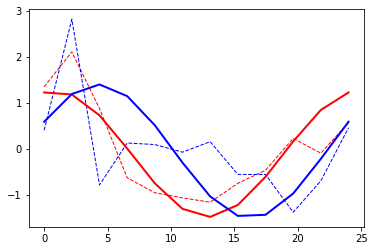

In [201]:
paramy, covariancey = curve_fit(sinusoid, X, ys, p0=get_p0(X,ys))
parama, covariancea = curve_fit(sinusoid, X, acs, p0=get_p0(X,acs))

plt.plot(X, stats.zscore(ys), color='red', linewidth=1,linestyle='dashed')
plt.plot(X, stats.zscore(acs), color='blue', linewidth=1,linestyle='dashed')
plt.plot(X, stats.zscore(sinusoid(X, *paramy)), color='red', linewidth=2)
plt.plot(X, stats.zscore(sinusoid(X, *parama)), color='blue', linewidth=2)
plt.show()

In [202]:
graphics_plot(y=[stats.zscore(sinusoid(X, *paramy)), stats.zscore(ys), stats.zscore(acs), 
                 stats.zscore(sinusoid(X, *parama))], 
              y_name=['Selected accidents - fit', 'Selected accidents - raw',
                      'Federal Highways - raw', 'Federal Highways - fit'],
              yaxes_title=['Fit'], title='Fitting an harmonic curve to the accidents',
              bins=Nbins, x_tick=agr)

In [205]:
graphics_plot(y=[stats.zscore(ys), stats.zscore(sinusoid(X, *paramy))], 
              y_name=['Selected accidents - fit', 'Selected accidents - raw'],
              yaxes_title=['Z-Score'], title='Fitting an harmonic curve to the accidents',
              bins=Nbins, x_tick=agr)

# **Salvar os resultados em csv**

In [ ]:
dfE3_final.to_csv('/content/drive/MyDrive/Trabalho/Datasets/E3_final.csv', encoding='utf-8')#, index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Datasets/E3_final.csv', index_col='HORA')
df.head()